In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# 1
def BGR2RGB(img):
    r = img[:, :, 2].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 0].copy()
    img[:, :, 0] = r
    img[:, :, 1] = g
    img[:, :, 2] = b
    return img

def RGB2BGR(img):
    b = img[:, :, 2].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 0].copy()
    img[:, :, 0] = b
    img[:, :, 1] = g
    img[:, :, 2] = r
    return img

img = cv2.imread("kurihara.jpg")
cv2.imwrite("output.jpg", BGR2RGB(img))
img = cv2.imread("output.jpg")
cv2.imwrite("output2.jpg", RGB2BGR(img))

True

In [51]:
# 2
def gray(img):
    R = img[:, :, 2]*0.2126
    G = img[:, :, 1]*0.7152
    B = img[:, :, 0]*0.0722
    Y = R + G + B
    return Y

img = cv2.imread("imori.jpg")
cv2.imwrite("output.jpg", gray(img))

True

In [106]:
# 3
def binary(img):
    gray_img = gray(img)
    mask0 = gray_img < 128
    mask1 = gray_img >= 128
    gray_img[mask0] = 0
    gray_img[mask1] = 255
    return gray_img

img = cv2.imread("kurihara.jpg")
cv2.imwrite("output.jpg", binary(img))

True

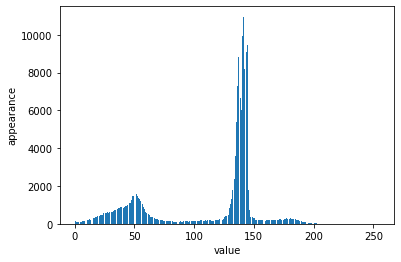

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


93


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.


In [109]:
# 4
def calc_values(gray_img, threshold):
    sum_all = gray_img.sum()
    pixels_all = gray_img.shape[0] * gray_img.shape[1]
    mask0 = gray_img < threshold
    M0 = gray_img[mask0].mean()
    omega0 = len(gray_img[mask0])
    
    mask1 = gray_img >= threshold
    M1 = gray_img[mask1].mean()
    omega1 = len(gray_img[mask1])
    return omega0, omega1, M0, M1

def calc_sigma(gray_img, threshold):
    omega0, omega1, M0, M1 = calc_values(gray_img, threshold)
    if omega0 == 0 or omega1 == 0:
        sigma = 0
    else:
        sigma = (omega0 * omega1) * ((M0 - M1)**2)
    return sigma

def calc_threshold(gray_img):
    sigmas = []
    for threshold in range(256):
        sigmas.append(calc_sigma(gray_img, threshold))
    sigmas = np.array(sigmas)
    optimal_threshold = np.argmax(sigmas)
    return optimal_threshold

def otsu(img):
    gray_img = gray(img)
    optimal_threshold = calc_threshold(gray_img)
    mask0 = gray_img < optimal_threshold
    mask1 = gray_img >= optimal_threshold
    gray_img[mask0] = 0
    gray_img[mask1] = 255
    print(optimal_threshold)
    cv2.imwrite("otsu_result.jpg", gray_img)

img = cv2.imread("kurihara.jpg")
gray_ = gray(img)
plt.hist(gray_.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel("value")
plt.ylabel("appearance")
plt.show()
img = cv2.imread("kurihara.jpg")
otsu(img)

In [174]:
# 5

def RGB2HSV(img):
    img = BGR2RGB(img)
    img = img / 255
    
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    MAX = img.max(axis=2)
    MIN = img.min(axis=2)
    MIN_arg = img.argmin(axis=2)
    
    mask_minmax = MAX==MIN
    mask_minB = MIN_arg != 2
    mask_minR = MIN_arg != 0
    mask_minG = MIN_arg != 1
    
    img_minB = ((60*(G-R)) / (MAX-MIN)) + 60
    img_minB = np.nan_to_num(img_minB)
    img_minR = ((60*(B-G)) / (MAX-MIN)) + 180
    img_minR = np.nan_to_num(img_minR)
    img_minG = ((60*(R-B)) / (MAX-MIN)) + 300
    img_minG = np.nan_to_num(img_minG)

    
    img[mask_minmax] = 0
    img_minB[mask_minB] = 0
    img_minR[mask_minR] = 0
    img_minG[mask_minG] = 0
    
    H = img_minB + img_minR + img_minG + np.zeros((img.shape[0],img.shape[0]))
    
    V = MAX
    
    S = MAX - MIN
    
    return (H, S, V)

def HSV2RGB(hsv):
    H = hsv[0]
    S = hsv[1]
    V = hsv[2]
    
    C = S
    HH = H / 60
    
    return rgb_img
img = cv2.imread("kurihara.jpg")
hsv = RGB2HSV(img)

In [134]:
img = cv2.imread("kurihara.jpg")
img = BGR2RGB(img)
img = img / 255
MAX = img.argmax(axis=2) 
MIN = img.min(axis=2)
mask = MAX==MIN
R = img[:,:,0]

In [178]:
hsv[1]

array([[0.02745098, 0.02745098, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098],
       ...,
       [0.03137255, 0.01960784, 0.01960784, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.03137255, 0.01960784, 0.01960784, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.03137255, 0.01960784, 0.01960784, ..., 0.02745098, 0.02745098,
        0.02745098]])

In [102]:
mask = gray_ < 128
m0 = gray_[mask].mean()
len()

128

In [149]:
a = np.array([1,1,1])
a.argmin()

0

In [47]:
binary(img)

array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ..., 140.4668, 136.9156,   0.    ],
       [  0.    ,   0.    ,   0.    , ..., 157.4106, 178.1482,   0.    ],
       ...,
       [172.5104,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [197.013 ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [153.8766, 129.0078,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [44]:
mask = gray_img < 128

In [55]:
gray_img[mask] = 0

In [56]:
cv2.imwrite("output.jpg", gray_img)

True

In [57]:
a = np.array([0,1,2])

In [58]:
mask = a != 0

In [59]:
a[mask] = 3

In [60]:
a

array([0, 3, 3])

In [62]:
mask.sum()

2